# TD1 - Introduction to Bayesian inference

## 1 - Introduction

In [1]:
import numpy as np
import scipy as sp 
import scipy.stats as spst 
import matplotlib.pyplot as plt
import itertools

## 2 - Maximum likelihood estimation

### 2.1 - Random sample generation

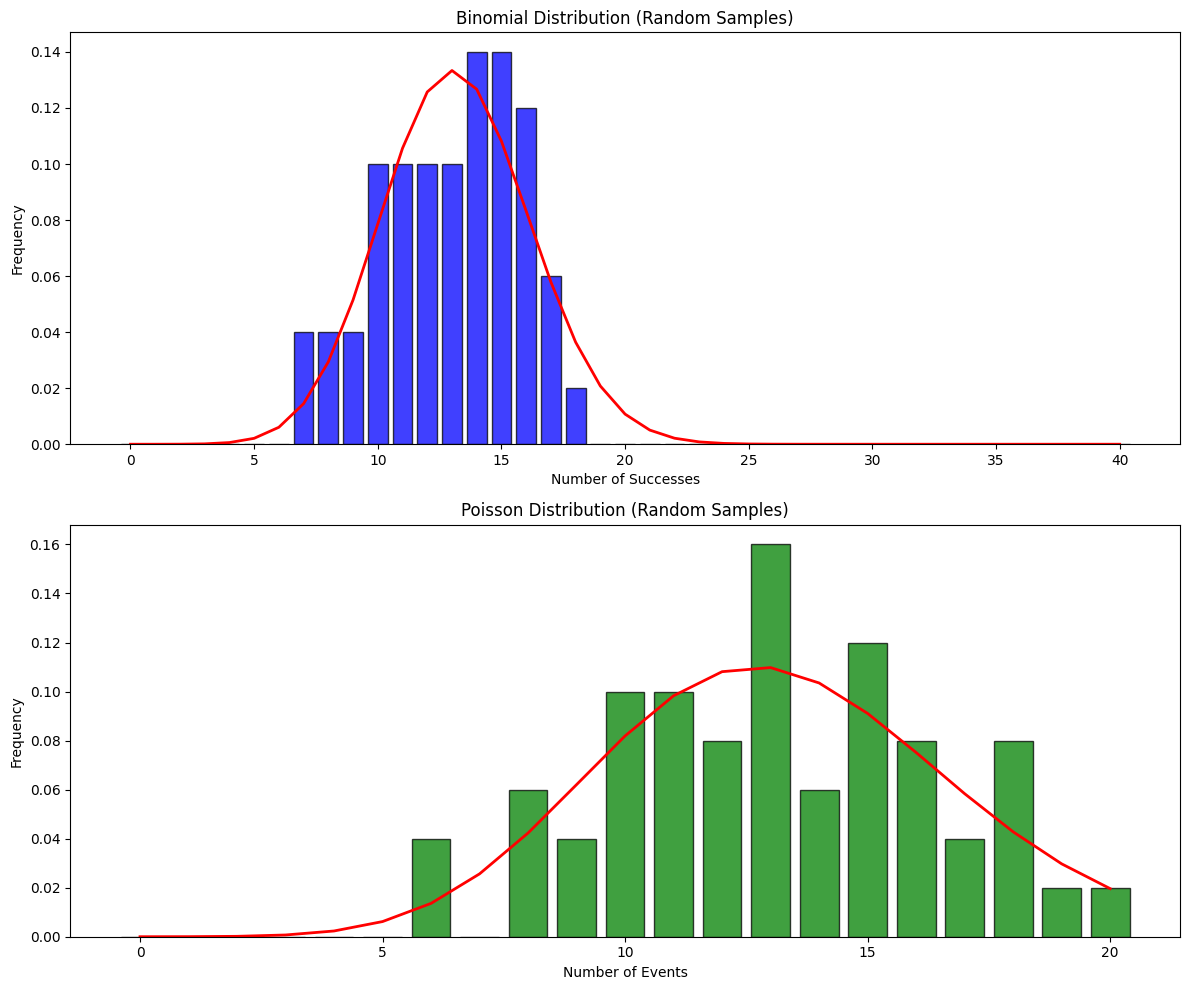

In [2]:
# Parameters
size = 50
n = 40
p = 0.33

# Generate binomial distribution samples
binom_distrib = np.random.binomial(n=n, p=p, size=size)

# Calculate lambda for Poisson distribution
lmbda = n * p

# Generate Poisson distribution samples
poisson_distrib = np.random.poisson(lam=lmbda, size=size)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot binomial distribution with true PMF
x_binom = np.arange(0, n + 1)
binom_counts = np.bincount(binom_distrib, minlength=n+1)
axs[0].bar(x_binom, binom_counts/size, alpha=0.75, color='blue', edgecolor='black')
axs[0].plot(x_binom, spst.binom.pmf(x_binom, n, p), 'r-', lw=2)
axs[0].set_title('Binomial Distribution (Random Samples)')
axs[0].set_xlabel('Number of Successes')
axs[0].set_ylabel('Frequency')

# Plot Poisson distribution with true PMF
max_poisson = max(poisson_distrib)
x_poisson = np.arange(0, max_poisson + 1)
poisson_counts = np.bincount(poisson_distrib, minlength=max_poisson + 1)
axs[1].bar(x_poisson, poisson_counts/size, alpha=0.75, color='green', edgecolor='black')
axs[1].plot(x_poisson, spst.poisson.pmf(x_poisson, lmbda), 'r-', lw=2)
axs[1].set_title('Poisson Distribution (Random Samples)')
axs[1].set_xlabel('Number of Events')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


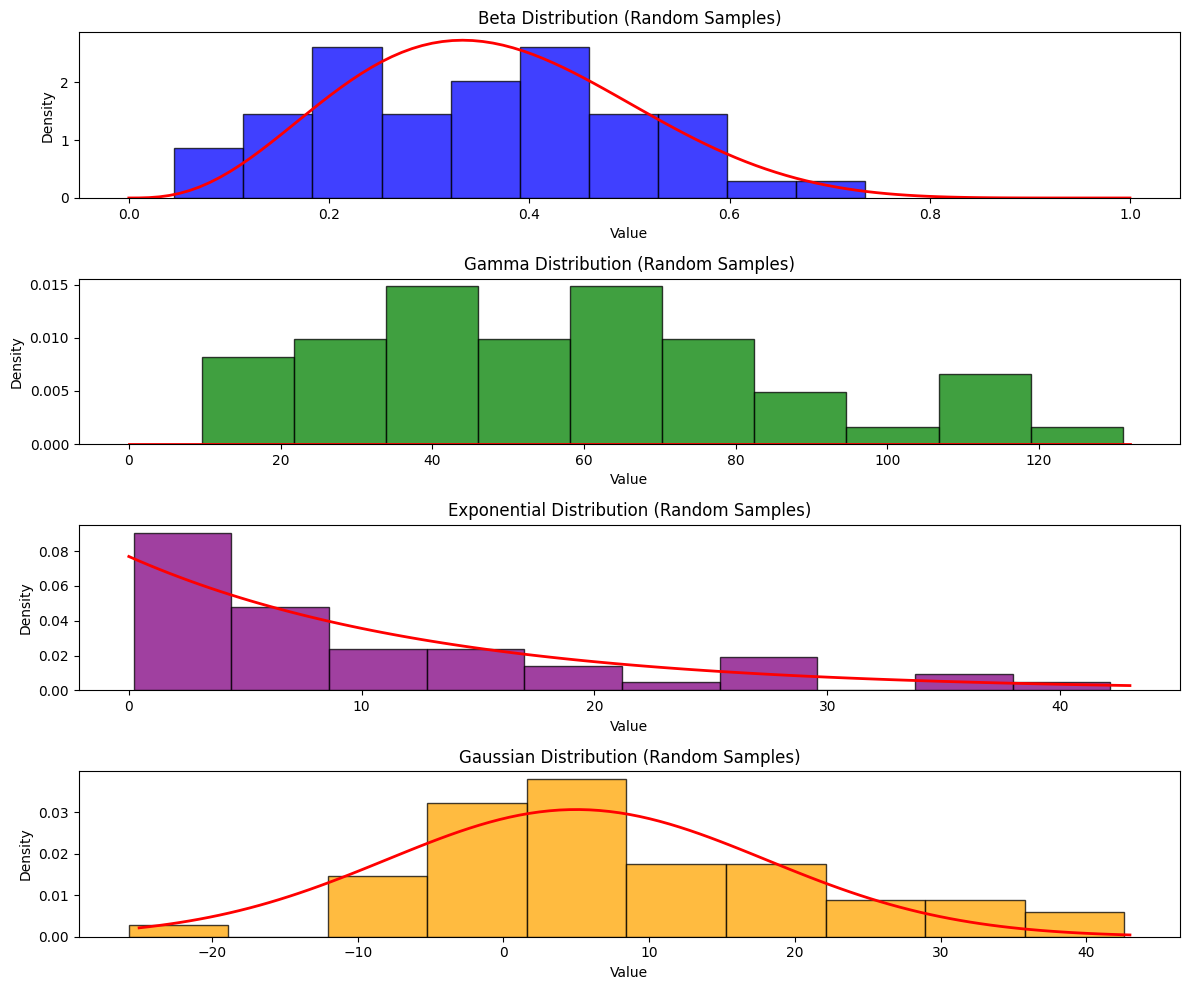

In [3]:
# Parameters
size = 50
a = 4
b = 7
scale = 13
loc = 5

beta_distrib = np.random.beta(a = a, b = b, size = size)
gamma_distrib = np.random.gamma(shape = a, size = size, scale = scale)
exponential_distrib = np.random.exponential(scale=scale, size=size)
gaussian_distrib = np.random.normal(loc = loc, scale = scale, size=size)

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

x_beta = np.linspace(0, 1, 100)
axs[0].hist(beta_distrib, bins=10, density=True, alpha=0.75, color='blue', edgecolor='black')
axs[0].plot(x_beta, spst.beta.pdf(x_beta, a, b), 'r-', lw=2)
axs[0].set_title('Beta Distribution (Random Samples)')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')

# Plot Gamma Distribution with true PDF
x_gamma = np.linspace(0, int(max(gamma_distrib)+1), 100)
axs[1].hist(gamma_distrib, bins=10, density=True, alpha=0.75, color='green', edgecolor='black')
axs[1].plot(x_gamma, spst.gamma.pdf(x_gamma, a=size, scale=scale), 'r-', lw=2)
axs[1].set_title('Gamma Distribution (Random Samples)')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Density')

# Plot Exponential Distribution with true PDF
x_exponential = np.linspace(0, int(max(exponential_distrib)+1), 100)
axs[2].hist(exponential_distrib, bins=10, density=True, alpha=0.75, color='purple', edgecolor='black')
axs[2].plot(x_exponential, spst.expon.pdf(x_exponential, scale=scale), 'r-', lw=2)
axs[2].set_title('Exponential Distribution (Random Samples)')
axs[2].set_xlabel('Value')
axs[2].set_ylabel('Density')

# Plot Gaussian Distribution with true PDF
x_gaussian = np.linspace(int(min(gaussian_distrib)), int(max(gaussian_distrib)+1), 100)
axs[3].hist(gaussian_distrib, bins=10, density=True, alpha=0.75, color='orange', edgecolor='black')
axs[3].plot(x_gaussian, spst.norm.pdf(x_gaussian, loc=loc, scale=scale), 'r-', lw=2)
axs[3].set_title('Gaussian Distribution (Random Samples)')
axs[3].set_xlabel('Value')
axs[3].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### 2.2 - Likelihood plot

In [4]:
def loglike(family_distrib, parameters, sample):
    """Compute the log likelihood of a sample."""
    if hasattr(family_distrib, 'logpmf'):
        ll = [family_distrib.logpmf(x, *parameters) for x in sample]
    elif hasattr(family_distrib, 'logpdf'):
        ll = [family_distrib.logpdf(x, *parameters) for x in sample]
    elif hasattr(family_distrib, 'pmf'):
        # Compute PMF and take the log manually
        ll = [np.log(family_distrib.pmf(x, *parameters)) for x in sample]
    elif hasattr(family_distrib, 'pdf'):
        # Compute PMF and take the log manually
        ll = [np.log(family_distrib.pdf(x, *parameters)) for x in sample]
    else:
        raise ValueError("The provided distribution does not have a logpmf or logpdf method.")
    
    return np.sum(ll)

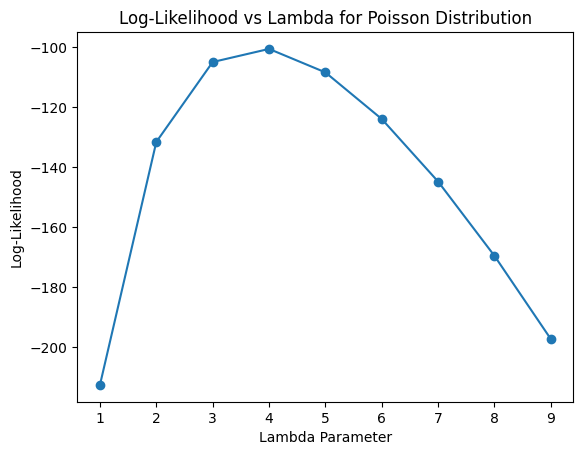

In [5]:
# Generate sample data
lmbda = 4
size = 50
poisson_distrib = np.random.poisson(lam=lmbda, size=size)

# Define range of parameter values to evaluate
param_values = range(0, 10)

# Compute log-likelihoods for each parameter value
loglikelihoods = [loglike(spst.poisson, parameters=(param,), sample=poisson_distrib) for param in param_values]

# Plot the results
plt.plot(param_values, loglikelihoods, marker='o')
plt.xlabel('Lambda Parameter')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Lambda for Poisson Distribution')
plt.show()

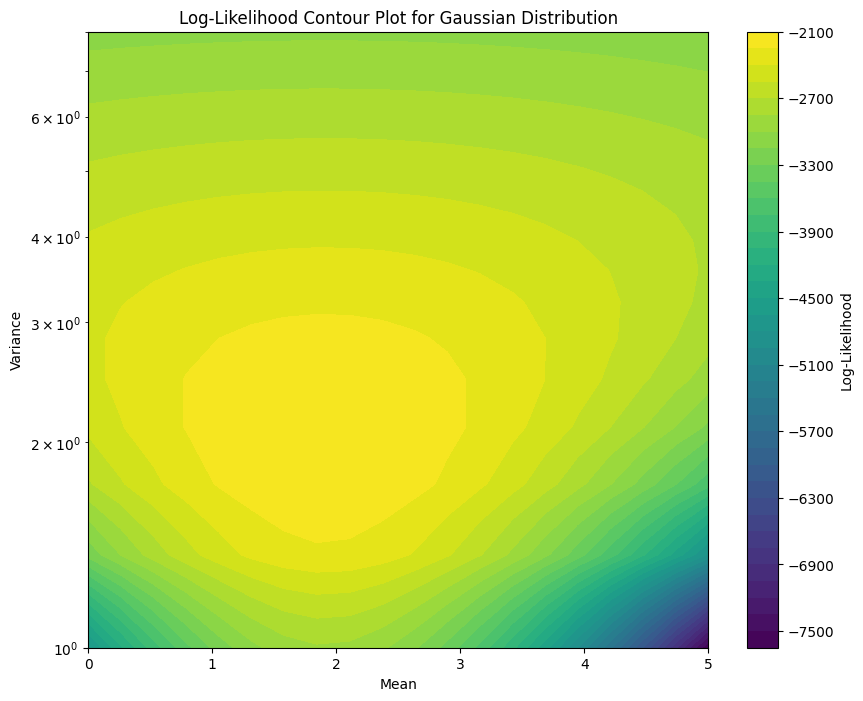

In [6]:
np.random.seed(0)
true_mu = 2
true_sigma2 = 4
size = 1000
sample = np.random.normal(loc=true_mu, scale=np.sqrt(true_sigma2), size=size)

# Define grid for mu and sigma2 values
mu_values = np.linspace(0, 5, 20)
sigma2_values = np.linspace(1, 8, 20)  # Variance must be positive

MU, SIGMA2 = np.meshgrid(mu_values, sigma2_values)
loglikelihoods = np.zeros_like(MU)

# Compute log-likelihood for each combination of mu and sigma2
for i in range(MU.shape[0]):
    for j in range(MU.shape[1]):
        loglikelihoods[i, j] = loglike(spst.norm, parameters=(MU[i, j], SIGMA2[i, j]), sample = sample)

# Plot the results
plt.figure(figsize=(10, 8))
contour = plt.contourf(MU, SIGMA2, loglikelihoods, levels=50, cmap='viridis')
plt.colorbar(contour, label='Log-Likelihood')
plt.xlabel('Mean')
plt.ylabel('Variance')
plt.yscale('log')  # To better visualize variance
plt.title('Log-Likelihood Contour Plot for Gaussian Distribution')
plt.show()

## 3 - Bayesian updating conjugate priors

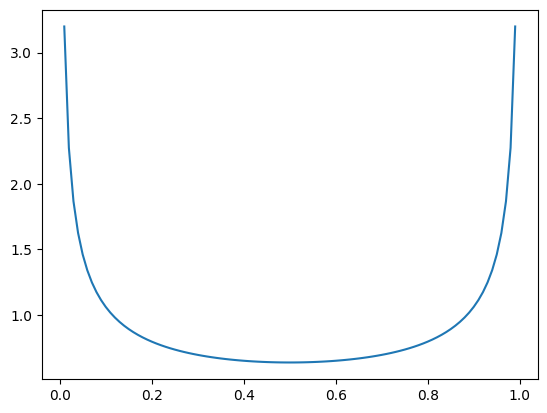

In [7]:
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt

distrib = spst.beta(a=0.5, b=0.5)
t = np.arange(start=0, stop = 1, step = 0.01)

fig1, ax1 = plt.subplots()
ax1.plot(t, distrib.pdf(t))

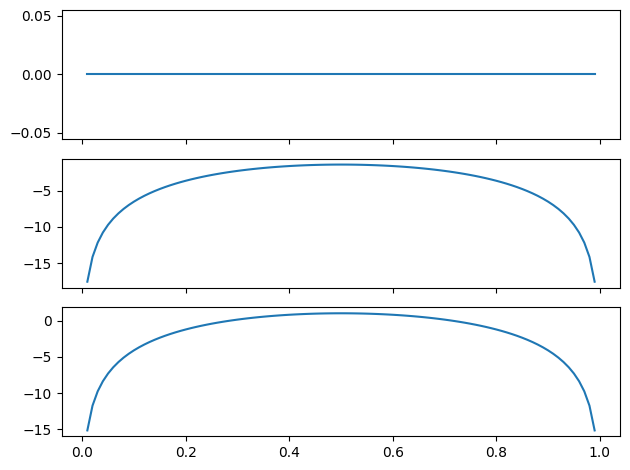

In [8]:
import math

nbin = 10

alpha, beta = 1, 1

sampl_dist = spst.binom(n=nbin, p=0.2)
prior_dist = spst.beta(a=alpha, b=beta)

x = 5

t = np.arange(start = 0.01, stop = 1, step = 0.01)
ll = [spst.binom.logpmf(x, nbin, p) for p in t]

post_dist = spst.beta(a=alpha+x, b=beta+nbin-x)

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout = True)

axs[0].plot(t, prior_dist.logpdf(t))
axs[1].plot(t, ll)
axs[2].plot(t, post_dist.logpdf(t))


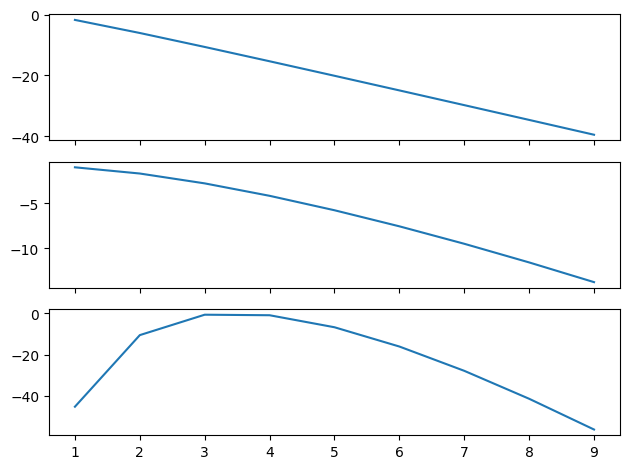

In [9]:
n = 20
x = np.random.poisson(lam=4, size=n)
sum_x = np.sum(x)

alpha, beta = 2, 5

sampl_dist = spst.poisson(mu = 1)
prior_dist = spst.gamma(a=alpha, scale=1/beta)

t = np.arange(start = 1, stop = 10, step = 1)
ll = [spst.poisson.logpmf(p, mu = 1) for p in t]

post_dist = spst.gamma(a=alpha + sum_x, scale=1/(beta + n))

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout = True)

axs[0].plot(t, prior_dist.logpdf(t))
axs[1].plot(t, ll)
axs[2].plot(t, post_dist.logpdf(t))

print(sampl_dist)

## 4. Normal-gamma Gaussian distribution

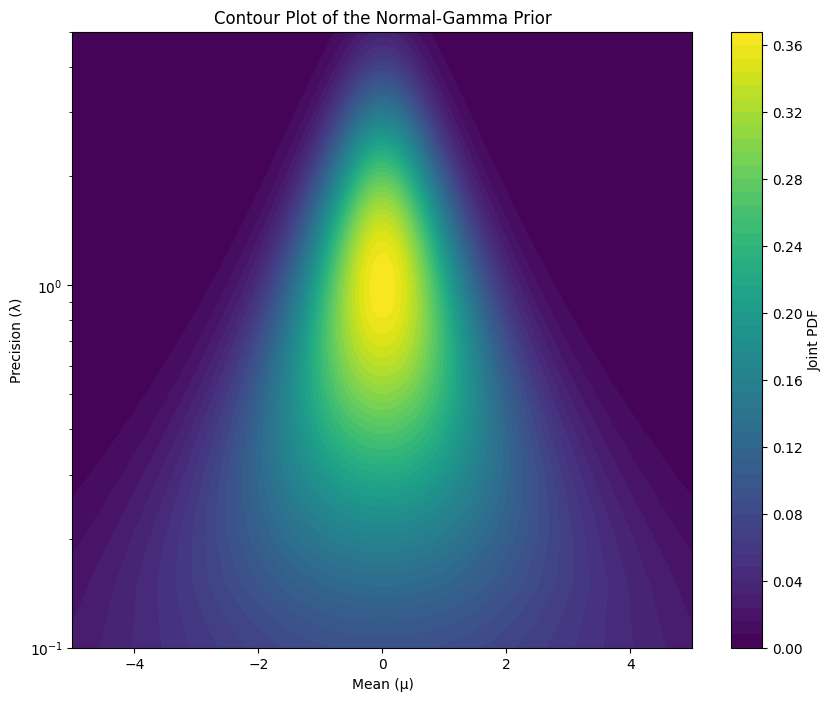

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def normal_gamma_pdf(mu, lambda_, alpha, beta, nu, eta):
    term1 = (beta ** alpha) / (gamma(alpha)) * (lambda_ ** (alpha - 1))
    term2 = np.exp(-beta * lambda_ - (eta * lambda_ / 2) * (mu - nu) ** 2)
    return term1 * term2

# Parameters
alpha = 2
beta = 1
nu = 0
eta = 1

# Define grid
mu_values = np.linspace(-5, 5, 100)
lambda_values = np.linspace(0.1, 5, 100)
MU, LAMBDA = np.meshgrid(mu_values, lambda_values)

# Compute joint PDF
pdf_values = normal_gamma_pdf(MU, LAMBDA, alpha, beta, nu, eta)

# Plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(MU, LAMBDA, pdf_values, levels=50, cmap='viridis')
plt.colorbar(contour, label='Joint PDF')
plt.xlabel('Mean (μ)')
plt.ylabel('Precision (λ)')
plt.title('Contour Plot of the Normal-Gamma Prior')
plt.yscale('log')  # Variance on a logarithmic scale for better visualization
plt.show()


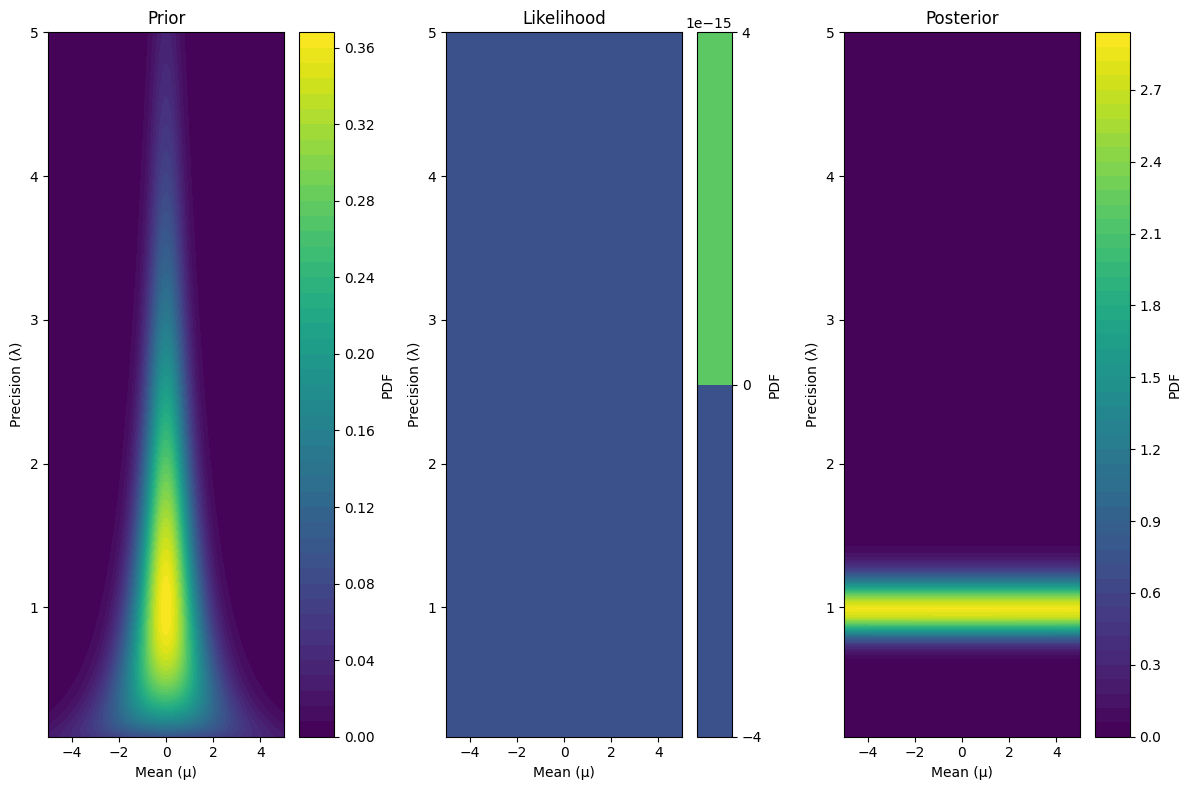

In [11]:
def likelihood_pdf(mu, lambda_, sample):
    n = len(sample)
    mean_x = np.mean(sample)
    return (lambda_ ** (n / 2)) * np.exp(-lambda_ / 2 * np.sum((sample - mu) ** 2))

# Sample data
np.random.seed(0)
sample = np.random.normal(loc=0, scale=1, size=100)
n = len(sample)

# Posterior parameters
alpha_post = alpha + n / 2
beta_post = beta + 0.5 * np.sum((sample - np.mean(sample)) ** 2)
mu_post_mean = (eta * nu + np.mean(sample) * n) / (eta + n)
lambda_post_var = 1 / ((eta + n) * beta_post)

# Define grid
mu_values = np.linspace(-5, 5, 100)
lambda_values = np.linspace(0.1, 5, 100)
MU, LAMBDA = np.meshgrid(mu_values, lambda_values)

# Compute prior, likelihood, and posterior
prior_pdf = normal_gamma_pdf(MU, LAMBDA, alpha, beta, nu, eta)
likelihood_pdf_vals = likelihood_pdf(MU, LAMBDA, sample)
posterior_pdf = normal_gamma_pdf(MU, LAMBDA, alpha_post, beta_post, mu_post_mean, lambda_post_var)

# Plot Prior
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.contourf(MU, LAMBDA, prior_pdf, levels=50, cmap='viridis')
plt.colorbar(label='PDF')
plt.xlabel('Mean (μ)')
plt.ylabel('Precision (λ)')
plt.title('Prior')

# Plot Likelihood
plt.subplot(1, 3, 2)
plt.contourf(MU, LAMBDA, likelihood_pdf_vals, levels=50, cmap='viridis')
plt.colorbar(label='PDF')
plt.xlabel('Mean (μ)')
plt.ylabel('Precision (λ)')
plt.title('Likelihood')

# Plot Posterior
plt.subplot(1, 3, 3)
plt.contourf(MU, LAMBDA, posterior_pdf, levels=50, cmap='viridis')
plt.colorbar(label='PDF')
plt.xlabel('Mean (μ)')
plt.ylabel('Precision (λ)')
plt.title('Posterior')

plt.tight_layout()
plt.show()
